In [ ]:
import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 import tensorflow as tf
 from tensorflow import keras
 from keras.models import Sequential
 from keras.layers import Dense
 from keras.layers import Flatten
 from keras.datasets import mnist
 from PIL import Image
 import cv2

#Importing Dataset and preprossing

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

##Plot a image

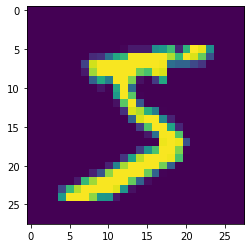

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
X_train[0].shape

(28, 28)

#Model

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=25)

Epoch 1/25
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7289 - accuracy: 0.8692
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2846 - accuracy: 0.9302
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1946 - accuracy: 0.9476
Epoch 4/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1631 - accuracy: 0.9533
Epoch 5/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1446 - accuracy: 0.9586
Epoch 6/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1344 - accuracy: 0.9628
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1275 - accuracy: 0.9648
Epoch 8/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1148 - accuracy: 0.9692
Epoch 9/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1032 - accuracy: 0.9707
Epoch 10/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.110

#Model Evaluation

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2249 - accuracy: 0.9682


[0.2248978316783905, 0.9682000279426575]

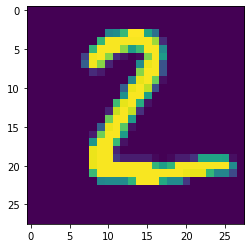

In [ ]:
plt.imshow(X_test[1])

In [ ]:
prediction = model.predict(X_test)
np.argmax(prediction[1])

313/313 [==============================] - 1s 2ms/step


2

##Test With new image

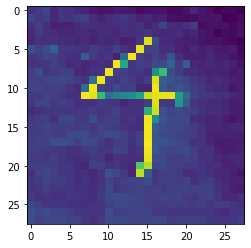

In [ ]:
digit_img = Image.open('4.jpg') 
bw_img = digit_img.convert(mode='L')
bw = bw_img.point(lambda x: 0 if x < 100 else 255, '1')
bw_img.save('bw.jpg')

read_img_data = cv2.imread('bw.jpg', cv2.IMREAD_GRAYSCALE) 
img_data = cv2.bitwise_not(read_img_data)
data = cv2.resize(img_data,(28,28))

plt.imshow(data)

In [ ]:
prediction = model.predict(data)
np.argmax(prediction)

1/1 [==============================] - 0s 21ms/step


3

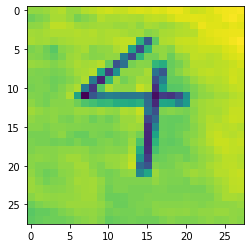

In [ ]:
img = Image.open('4.jpg') 

gray_img = img.convert(mode='L')

resized_img = gray_img.resize((28,28))

#display(resized_img)
resized_img_data = np.asarray(resized_img)
#print(resized_img_data)
plt.imshow(resized_img_data)

In [ ]:
prediction = model.predict(resized_img_data)
np.argmax(prediction)

1/1 [==============================] - 0s 24ms/step


8